In [1]:
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,5)

import os

In [2]:
def corrupt_image(img, noise):
    noise_height, noise_width, _ = noise.shape
    
    img[100:100 + noise_height, 100:100 + noise_width] = noise
    
    return img

In [44]:
def corrupt_image_overall(img, noise):
    
    img = np.array(img/255, dtype=float)
    
    noise = cv2.resize(noise, (img.shape[1], img.shape[0]))

    out = img + noise
    
    if out.min() < 0:
        low_clip = -1.
    else:
        low_clip = 0.
        
    out = np.clip(out, low_clip, 1.0)
    out = np.uint8(out*255)
    
    return out

In [3]:
import random

def generate_salt_peper_noise_patch(width, height):
    noise_patch = np.zeros((width, height))

    for i in range(height):
        for j in range(width):
            if random.choice([True, False]):
                noise_patch[i, j] = 255
    
    rgb_patch = np.stack((noise_patch, noise_patch, noise_patch), axis=-1)
    
    return rgb_patch

In [33]:
img1 = cv2.imread("GMA-main/vis_kitti/image/9_0.png")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

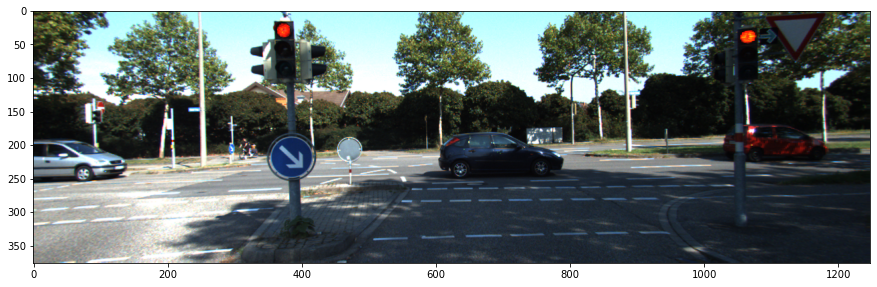

In [34]:
plt.imshow(img1)

In [9]:
noise = generate_salt_peper_noise_patch(150, 150)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


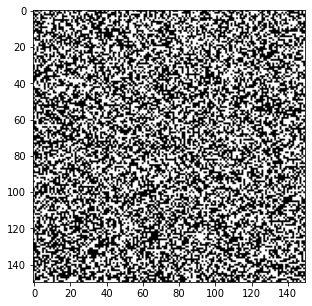

In [14]:
plt.imshow(noise)

In [7]:
source_folder = "KITTI/testing/image_2/"
target_folder = "KITTI/testing/image_2_corr_snp_100"

noise = cv2.imread("noise/salt_n_pepper/noise_100.png")


for img_name in os.listdir(source_folder):
    img = cv2.imread(os.path.join(source_folder, img_name))
        
    img = corrupt_image(img, noise)
    
    cv2.imwrite(os.path.join(target_folder, img_name), img)

In [45]:
import random
random.seed(228)

source_folder = "KITTI/testing/image_2/"
target_folder = "KITTI/testing/image_2_corr_gauss_var_005"

noise = np.random.normal(0, 0.05, (380, 1250, 3))

for img_name in os.listdir(source_folder):
    img = cv2.imread(os.path.join(source_folder, img_name))
        
    img = corrupt_image_overall(img, noise)
    
    cv2.imwrite(os.path.join(target_folder, img_name), img)